## Importing libraries

In [96]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

## Data Preprocessing

### Training image preprocessing

In [97]:
training_set = tf.keras.utils.image_dataset_from_directory(
'train',
labels="inferred",
label_mode="categorical",
class_names=None,
color_mode="rgb",
batch_size=32,
image_size=(128, 128),
shuffle=True,
seed=None,
validation_split=None,
subset=None,
interpolation="bilinear",
follow_links=False,
crop_to_aspect_ratio=False,
)

Found 91885 files belonging to 54 classes.


### validation image preprocessing

In [98]:
validation_set = tf.keras.utils.image_dataset_from_directory(
'valid',
labels="inferred",
label_mode="categorical",
class_names=None,
color_mode="rgb",
batch_size=32,
image_size=(128, 128),
shuffle=True,
seed=None,
validation_split=None,
subset=None,
interpolation="bilinear",
follow_links=False,
crop_to_aspect_ratio=False,
)

Found 91885 files belonging to 54 classes.


In [99]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 54), dtype=tf.float32, name=None))>

In [100]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[110.75       97.75      104.75     ]
   [136.        123.        130.       ]
   [127.5       114.5       121.5      ]
   ...
   [160.25      150.25      158.25     ]
   [165.25      155.25      163.25     ]
   [164.75      154.75      162.75     ]]

  [[117.75      104.75      111.75     ]
   [134.25      121.25      128.25     ]
   [125.        112.        119.       ]
   ...
   [165.75      155.75      163.75     ]
   [165.        155.        163.       ]
   [166.75      156.75      164.75     ]]

  [[114.5       101.5       108.5      ]
   [124.25      111.25      118.25     ]
   [128.25      115.25      122.25     ]
   ...
   [167.5       157.5       165.5      ]
   [159.75      149.75      157.75     ]
   [164.25      154.25      162.25     ]]

  ...

  [[107.75       95.75      105.75     ]
   [103.         91.        101.       ]
   [114.        102.        112.       ]
   ...
   [142.75      134.75      145.75     ]
   [143.75      135.75      146.75     ]
   [1

## Building Model

In [101]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [102]:
model = Sequential()

### Building convolution layer

In [103]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [104]:
#model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(32, (3, 3), padding='SAME', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [105]:
#model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(64, (3, 3), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [106]:
#model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(128, (3, 3), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [107]:
#model.add(Conv2D(filters=512, kernel_size=2, activation='relu'))model.add(Conv2D(filters=512, kernel_size=2, activation='relu'))model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(256, (3, 3), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [108]:
#model.add(Conv2D(filters=1024, kernel_size=2, activation='relu'))model.add(Conv2D(filters=1024, kernel_size=2, activation='relu'))model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(512, (3, 3), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [109]:
model.add(Conv2D(1024, (3, 3), padding='SAME', activation='relu'))

In [110]:
model.add(Dropout(0.25)) # to avoid Overfitting

In [111]:
model.add(Flatten())

In [112]:
model.add(Dense(units=2500,activation='relu'))

In [113]:
model.add(Dropout(0.4))

In [114]:
# Output layer
model.add(Dense(units=54,activation='softmax'))

### Compiling Model

In [115]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 63, 63, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 1, 1, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2500)           │     2,562,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 54)             │       135,054 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,004,242 (34.35 MB)

 Trainable params: 9,004,242 (34.35 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [117]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2872/2872 ━━━━━━━━━━━━━━━━━━━━ 2176s 756ms/step - accuracy: 0.4387 - loss: 2.0634 - val_accuracy: 0.8598 - val_loss: 0.4392
Epoch 2/10
2872/2872 ━━━━━━━━━━━━━━━━━━━━ 2215s 771ms/step - accuracy: 0.8327 - loss: 0.5201 - val_accuracy: 0.9098 - val_loss: 0.2670
Epoch 3/10
2872/2872 ━━━━━━━━━━━━━━━━━━━━ 2268s 790ms/step - accuracy: 0.8922 - loss: 0.3262 - val_accuracy: 0.9428 - val_loss: 0.1714
Epoch 4/10
2872/2872 ━━━━━━━━━━━━━━━━━━━━ 2558s 891ms/step - accuracy: 0.9186 - loss: 0.2392 - val_accuracy: 0.9396 - val_loss: 0.1704
Epoch 5/10
2872/2872 ━━━━━━━━━━━━━━━━━━━━ 2350s 818ms/step - accuracy: 0.9364 - loss: 0.1851 - val_accuracy: 0.9517 - val_loss: 0.1327
Epoch 6/10
2872/2872 ━━━━━━━━━━━━━━━━━━━━ 2236s 779ms/step - accuracy: 0.9478 - loss: 0.1478 - val_accuracy: 0.9697 - val_loss: 0.0835
Epoch 7/10
2872/2872 ━━━━━━━━━━━━━━━━━━━━ 2151s 749ms/step - accuracy: 0.9567 - loss: 0.1207 - val_accuracy: 0.9716 - val_loss: 0.0780
Epoch 8/10
2872/2872 ━━━━━━━━━━━━━━━━━━━━ 2858s 995ms/s

## Model Evaluadation

In [137]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2872/2872 ━━━━━━━━━━━━━━━━━━━━ 290s 101ms/step - accuracy: 0.9727 - loss: 0.0753


In [138]:
print(train_loss,train_acc)

0.06747138500213623 0.9758720397949219


In [ ]:
#Model on validation set
val_loss,val_acc = model.evaluate(validation_set)

1741/2872 ━━━━━━━━━━━━━━━━━━━━ 1:56 103ms/step - accuracy: 0.9759 - loss: 0.0650

In [121]:
print(val_loss,val_acc)

0.06747136265039444 0.9758720397949219


## Saving Model

In [122]:
model.save("trained_model.keras")

In [123]:
training_history.history

{'accuracy': [0.6266311407089233,
  0.8522610068321228,
  0.9004407525062561,
  0.9238613247871399,
  0.9407629370689392,
  0.9500462412834167,
  0.9592098593711853,
  0.9641290903091431,
  0.969048261642456,
  0.9714425802230835],
 'loss': [1.280531406402588,
  0.4563363492488861,
  0.3002646267414093,
  0.2237449288368225,
  0.17293356359004974,
  0.14030610024929047,
  0.11481783539056778,
  0.10333582013845444,
  0.08887848258018494,
  0.08205296844244003],
 'val_accuracy': [0.8598465323448181,
  0.9097567796707153,
  0.9428307414054871,
  0.9396310448646545,
  0.9517113566398621,
  0.9696577191352844,
  0.9716493487358093,
  0.9737389087677002,
  0.9777330160140991,
  0.9758720397949219],
 'val_loss': [0.4392094314098358,
  0.2670160233974457,
  0.17144623398780823,
  0.17039555311203003,
  0.1327018290758133,
  0.08353862911462784,
  0.07799899578094482,
  0.0726633071899414,
  0.061976246535778046,
  0.06747138500213623]}

In [124]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

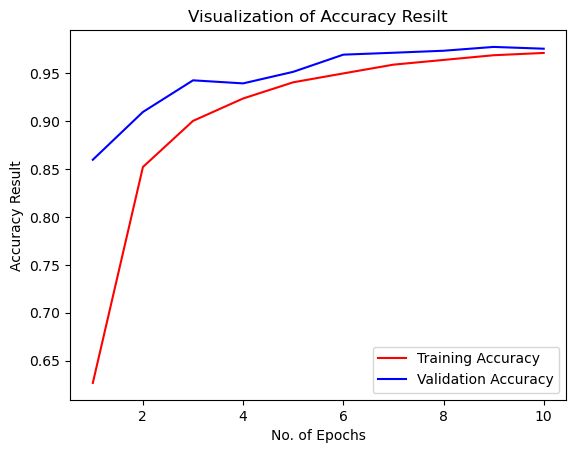

In [125]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'], color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Resilt")
plt.legend()
plt.show()

### Some  other metrics for model evaluation 

In [126]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Bean___angular_leaf_spot',
 'Bean___rust',
 'Beans___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn___Common_Rust',
 'Corn___Gray_Leaf_Spot',
 'Corn___Healthy',
 'Corn___Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Invalid',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_Blight',
 'Potato___Healthy',
 'Potato___Late_Blight',
 'Raspberry___healthy',
 'Rice___Brown_Spot',
 'Rice___Healthy',
 'Rice___Hispa',
 'Rice___Leaf_Blast',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Sugarcane___Healthy',
 'Sugarcane___Mosaic',
 'Sugarcane___RedRot',
 'Suga

In [127]:
test_set = tf.keras.utils.image_dataset_from_directory(
'valid',
labels="inferred",
label_mode="categorical",
class_names=None,
color_mode="rgb",
batch_size=32,
image_size=(128, 128),
shuffle=False,
seed=None,
validation_split=None,
subset=None,
interpolation="bilinear",
follow_links=False,
crop_to_aspect_ratio=False,
)

Found 91885 files belonging to 54 classes.


In [128]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

2872/2872 ━━━━━━━━━━━━━━━━━━━━ 289s 101ms/step


(array([[9.9650049e-01, 1.0508997e-07, 6.8693296e-08, ..., 5.9996754e-09,
         1.3737120e-07, 5.7115157e-09],
        [1.0000000e+00, 1.8846792e-13, 1.6223386e-13, ..., 4.4345460e-16,
         2.2495520e-13, 1.5137710e-16],
        [1.0000000e+00, 6.5261945e-15, 1.3975434e-13, ..., 1.7406047e-17,
         3.8553751e-15, 2.8251171e-18],
        ...,
        [2.1079030e-07, 5.2263643e-10, 1.5644918e-08, ..., 5.6342039e-02,
         2.3291796e-04, 8.9989752e-01],
        [6.7783380e-06, 2.2716488e-07, 1.3557593e-06, ..., 5.7396874e-02,
         4.5251781e-03, 8.3660173e-01],
        [3.3989225e-11, 1.1835509e-11, 4.0398403e-11, ..., 4.1023845e-06,
         1.2687046e-05, 9.9997997e-01]], dtype=float32),
 (91885, 54))

In [129]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [130]:
predicted_categories 

<tf.Tensor: shape=(91885,), dtype=int64, numpy=array([ 0,  0,  0, ..., 53, 53, 53], dtype=int64)>

In [131]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(91885, 54), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [132]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(91885,), dtype=int64, numpy=array([ 0,  0,  0, ..., 53, 53, 53], dtype=int64)>

In [133]:
from sklearn.metrics import classification_report,confusion_matrix

In [134]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.99      0.99      0.99      2016
                            Apple___Black_rot       1.00      0.99      0.99      1987
                     Apple___Cedar_apple_rust       0.99      0.97      0.98      1760
                              Apple___healthy       0.95      1.00      0.97      2008
                     Bean___angular_leaf_spot       0.84      0.97      0.90       345
                                  Bean___rust       0.99      0.76      0.86       348
                              Beans___healthy       0.90      1.00      0.95       341
                          Blueberry___healthy       0.97      1.00      0.98      1816
     Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00      1683
            Cherry_(including_sour)___healthy       1.00      0.99      1.00      1826
                           Corn___Common_R

In [135]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(54, 54)

### Confusion Matrix  Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

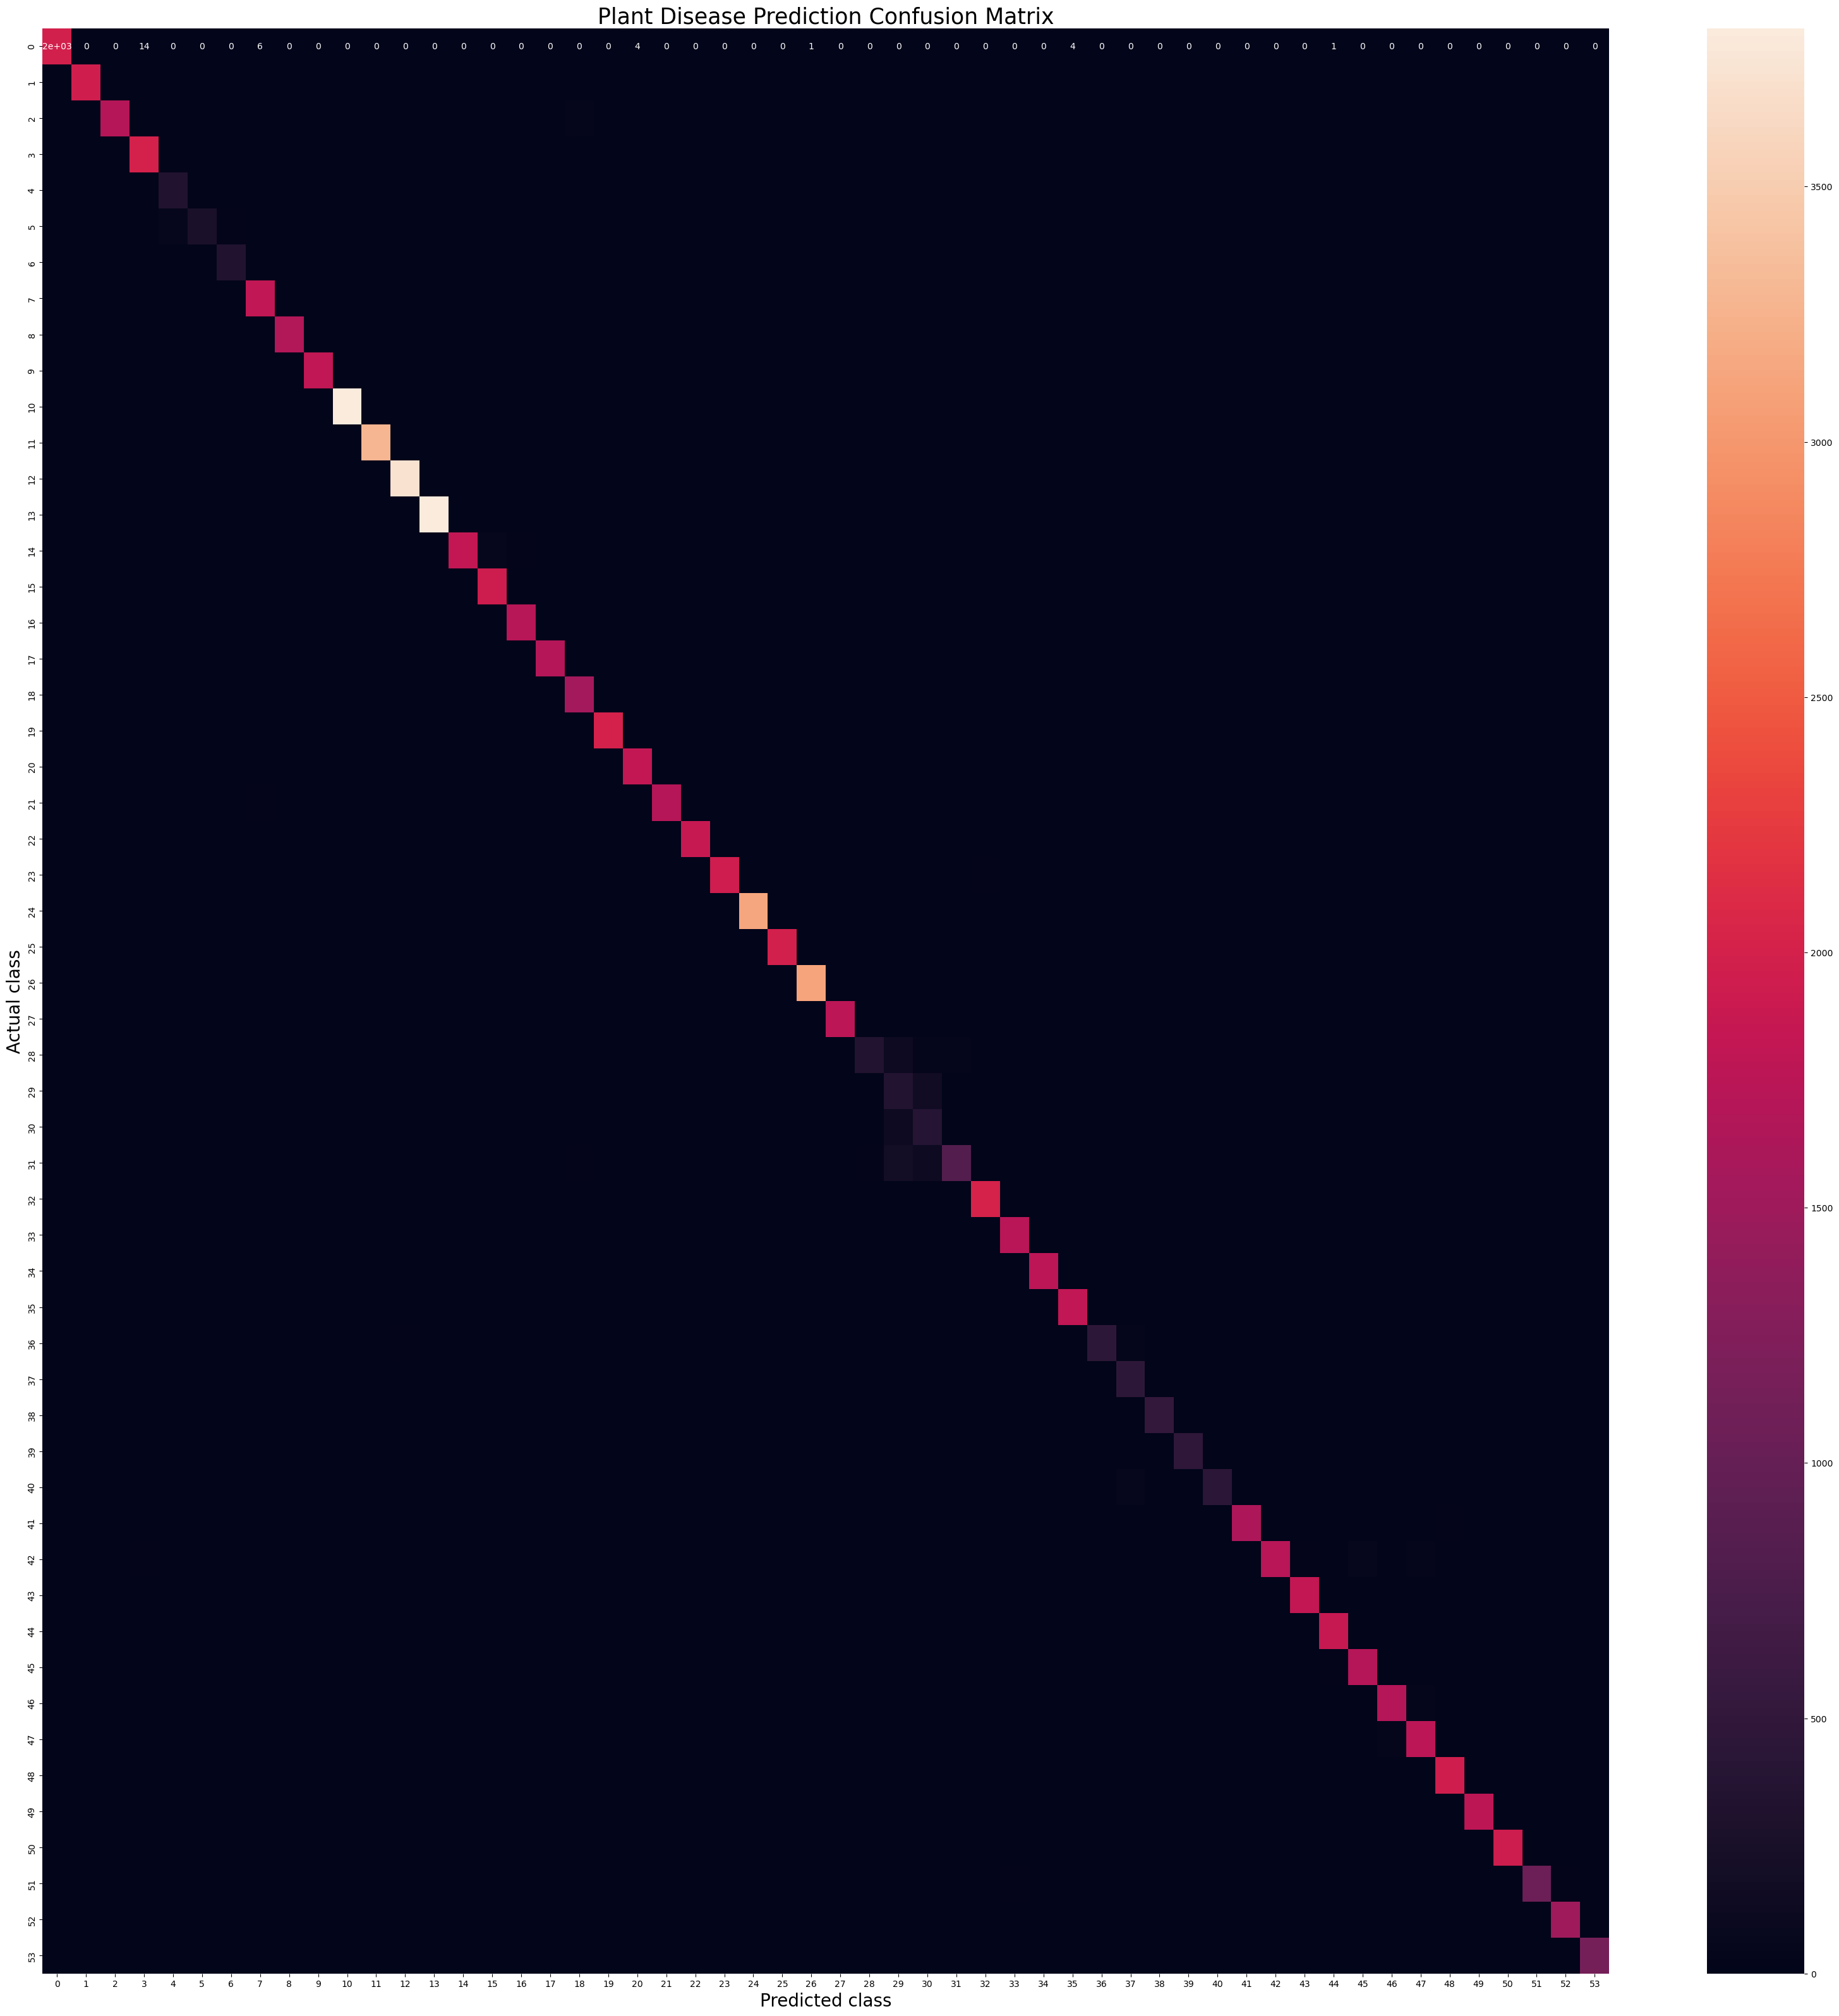

In [136]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show